In [2]:
import math
import numpy as np
import re
import os
import tensorflow as tf
import cv2
from collections import Counter
from matplotlib import pyplot as plt
from PIL import Image
import glob
import array
from numpy import argmax
import tensorflow as tf
from tensorflow import keras
from numpy import array
from array import array 
from PIL import Image
import pandas as pd

from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import optimizers
from keras.utils import plot_model
from keras import backend

VALIDATION_SPLIT = 0.3

DATADIR = "/home/fizzer/enph353_cnn_lab/pictures/"


/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [3]:
# getting x data

xdata = []

path = os.path.join(DATADIR)  # create path to dogs and cats
for img in os.listdir(path):  # iterate over each image per dogs and cats
    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
    (thesh, binary_img_array) = cv2.threshold(img_array, 127, 255, cv2.THRESH_BINARY_INV)

    cropImg = (binary_img_array[75:235, 50:550])

    a1 = (cropImg[0:150, 0:100])
    a2 = (cropImg[0:150, 100:200])
    a3 = (cropImg[0:150, 300:400])  
    a4 = (cropImg[0:150, 400:500])
    
    xdata.append(a1)
    xdata.append(a2)
    xdata.append(a3)
    xdata.append(a4)

x_train = np.array(xdata)
x_train = tf.keras.utils.normalize(x_train, axis=1)
xtrain = np.expand_dims(x_train, 3)

print(xtrain.shape)



(1088, 150, 100, 1)


In [4]:
ydata = []
for name in glob.glob("/home/fizzer/enph353_cnn_lab/pictures/*"):

    ydata.append(name[44])
    ydata.append(name[45])
    ydata.append(name[46])
    ydata.append(name[47])

# define universe of possible input values
alphabet = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

# integer encode input data
integer_encoded = [char_to_int[char] for char in ydata]

# one hot encode
onehot_encoded = list()
for value in integer_encoded:
	letter = [0 for _ in range(len(alphabet))]
	letter[value] = 1
	onehot_encoded.append(letter)

# invert encoding
inverted = int_to_char[argmax(onehot_encoded[0])]

X_dataset = xtrain
y_train = onehot_encoded
Y_dataset = np.array(y_train)

print(X_dataset.shape)

(1088, 150, 100, 1)


In [5]:
def reset_weights(model):
    session = backend.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)

conv_model = models.Sequential()
conv_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                             input_shape=(150, 100, 1)))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dropout(0.5))
conv_model.add(layers.Dense(512, activation='relu'))
conv_model.add(layers.Dense(36, activation='softmax'))

conv_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_conv = conv_model.fit(X_dataset, Y_dataset, 
                              validation_split=VALIDATION_SPLIT, 
                              epochs=15, 
                              batch_size=16)




Train on 761 samples, validate on 327 samples
Epoch 1/15
761/761 [==============================] - 18s 24ms/step - loss: 1.9033 - accuracy: 0.5151 - val_loss: 0.3590 - val_accuracy: 0.8746
Epoch 2/15
761/761 [==============================] - 17s 22ms/step - loss: 0.1579 - accuracy: 0.9501 - val_loss: 0.1395 - val_accuracy: 0.9817
Epoch 3/15
761/761 [==============================] - 18s 24ms/step - loss: 0.0694 - accuracy: 0.9895 - val_loss: 0.0241 - val_accuracy: 0.9817
Epoch 4/15
761/761 [==============================] - 17s 22ms/step - loss: 0.0461 - accuracy: 0.9869 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 5/15
761/761 [==============================] - 16s 22ms/step - loss: 0.0378 - accuracy: 0.9882 - val_loss: 0.0811 - val_accuracy: 0.9817
Epoch 6/15
761/761 [==============================] - 16s 22ms/step - loss: 0.0310 - accuracy: 0.9921 - val_loss: 0.0423 - val_accuracy: 0.9817
Epoch 7/15
761/761 [==============================] - 16s 22ms/step - loss: 0.0485 - acc

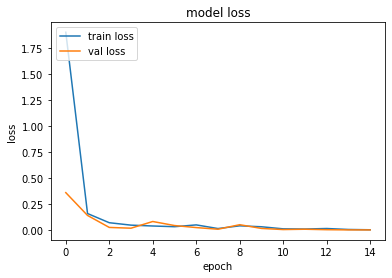

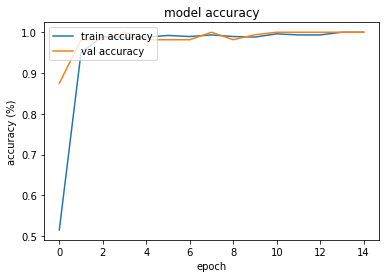

In [6]:
plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

plt.plot(history_conv.history['accuracy'])
plt.plot(history_conv.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy (%)')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'val accuracy'], loc='upper left')
plt.show()

conv_model.save('epic_num_reader.model')

DATADIRT = "/home/fizzer/enph353_cnn_lab/pictures_test/"

In [7]:

xdatatest = []
ydatatest = []

path = os.path.join("/home/fizzer/enph353_cnn_lab/pictures_test/")  # create path to dogs and cats
for img in os.listdir(path):  # iterate over each image per dogs and cats
    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
    (thesh, binary_img_array) = cv2.threshold(img_array, 127, 255, cv2.THRESH_BINARY_INV)

    cropImg = (binary_img_array[75:235, 50:550])

    a1 = (cropImg[0:150, 0:100])
    a2 = (cropImg[0:150, 100:200])
    a3 = (cropImg[0:150, 300:400])  
    a4 = (cropImg[0:150, 400:500])
    
    xdatatest.append(a1)
    xdatatest.append(a2)
    xdatatest.append(a3)
    xdatatest.append(a4)

x_test = np.array(xdatatest)
x_test = tf.keras.utils.normalize(x_test, axis=1)
x_teste = np.expand_dims(x_test, 3)

print(x_test.shape)

for name in glob.glob("/home/fizzer/enph353_cnn_lab/pictures_test/*"):
    
    ydatatest.append(name[49])
    ydatatest.append(name[50])
    ydatatest.append(name[51])
    ydatatest.append(name[52])


valuestest = ydatatest
print(valuestest)
print(len(valuestest))

(64, 150, 100)
['E', 'X', '9', '2', 'G', 'C', '2', '8', 'K', 'U', '5', '7', 'W', 'J', '5', '9', 'Y', 'S', '3', '1', 'N', 'I', '1', '6', 'H', 'R', '3', '5', 'N', 'Y', '4', '4', 'Q', 'R', '2', '0', 'A', 'A', '3', '9', 'U', 'C', '5', '2', 'R', 'U', '1', '4', 'M', 'X', '9', '7', 'W', 'I', '2', '8', 'Q', 'X', '4', '5', 'D', 'W', '6', '3']
64


In [8]:
integer_encoded = [char_to_int[char] for char in ydatatest]

# one hot encode
onehot_encoded = list()
for value in integer_encoded:
	letter = [0 for _ in range(len(alphabet))]
	letter[value] = 1
	onehot_encoded.append(letter)

# invert encoding
inverted = int_to_char[argmax(onehot_encoded[0])]

new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_teste)

i = 0
y_predict = []
while i < len(predictions):
    y_predict.append(int_to_char[np.argmax(predictions[i])])
    i+=1
print(y_predict)

['E', 'X', '9', '2', 'G', 'C', '2', '8', 'K', 'U', '5', '7', 'W', 'J', '5', '9', 'Y', 'S', '3', '1', 'N', 'I', '1', '6', 'H', 'R', '3', '5', 'N', 'Y', '4', '4', 'Q', 'R', '2', '0', 'A', 'A', '3', '9', 'U', 'C', '5', '2', 'R', 'U', '1', '4', 'M', 'X', '9', '7', 'W', 'I', '2', '8', 'Q', 'X', '4', '5', 'D', 'W', '6', '3']


E


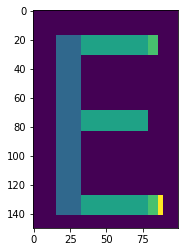

X


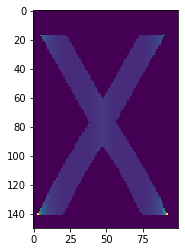

9


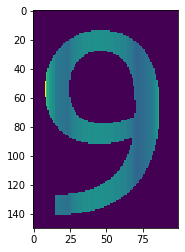

2


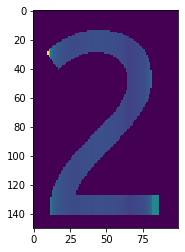

G


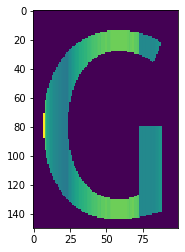

C


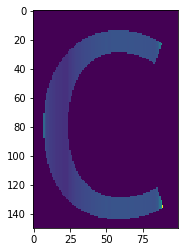

2


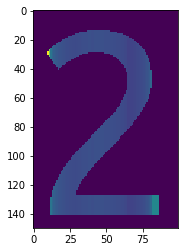

8


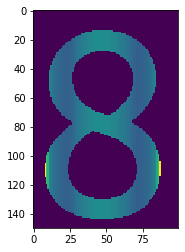

K


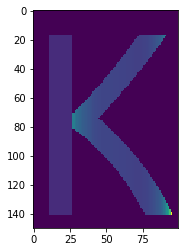

U


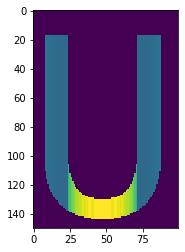

5


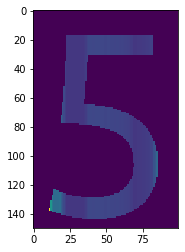

7


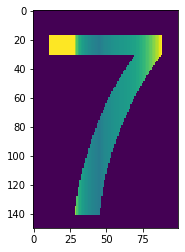

W


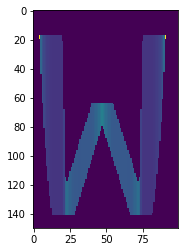

J


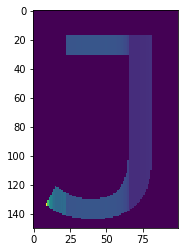

5


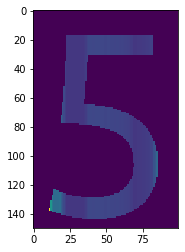

9


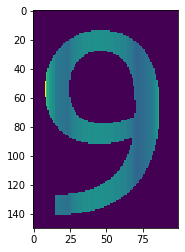

Y


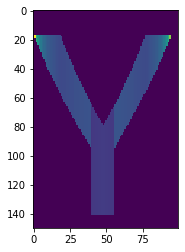

S


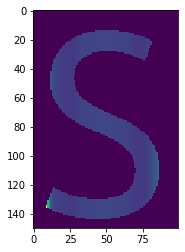

3


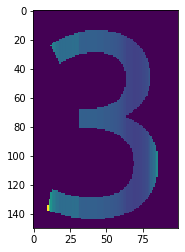

1


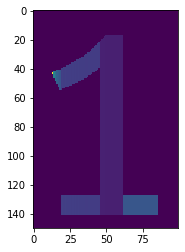

N


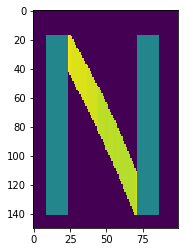

I


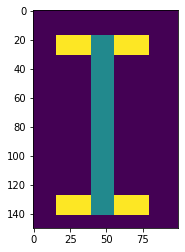

1


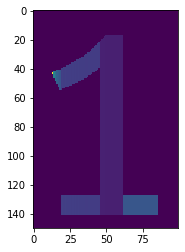

6


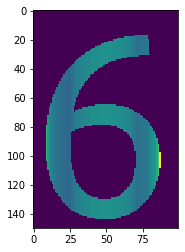

H


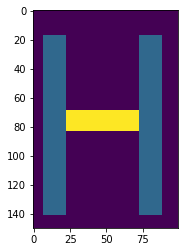

R


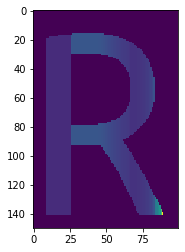

3


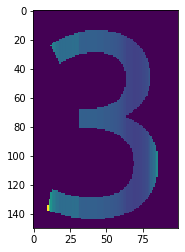

5


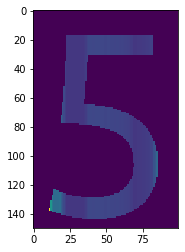

N


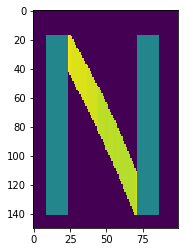

Y


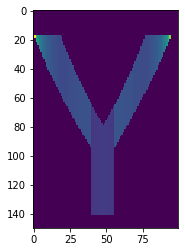

4


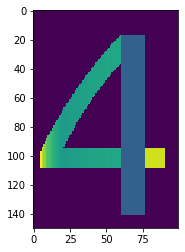

4


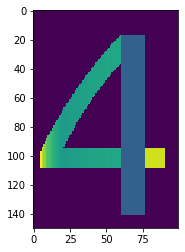

Q


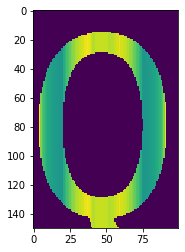

R


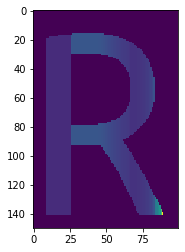

2


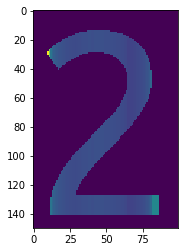

0


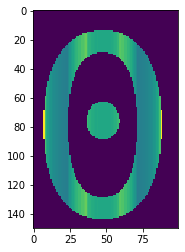

A


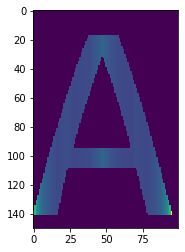

A


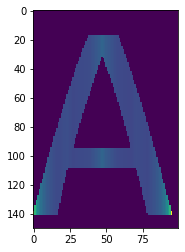

3


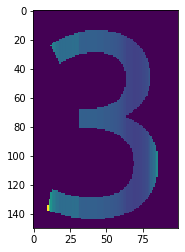

9


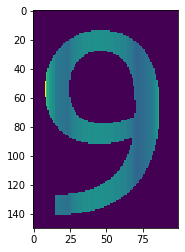

U


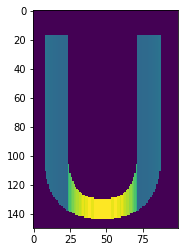

C


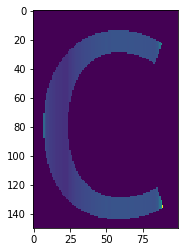

5


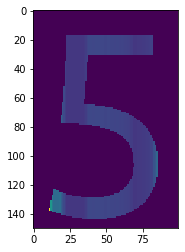

2


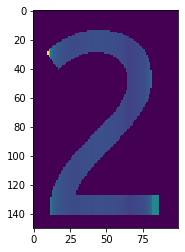

R


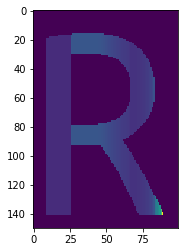

U


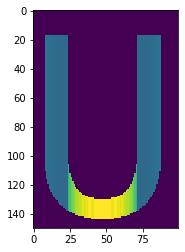

1


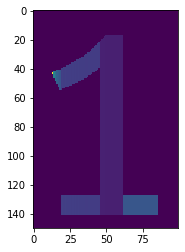

4


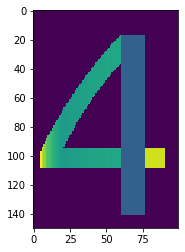

M


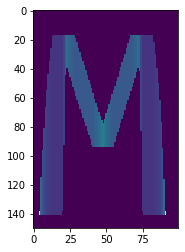

X


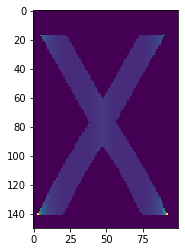

9


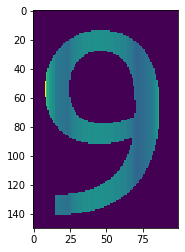

7


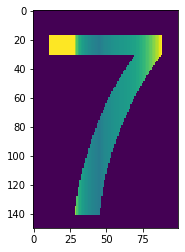

W


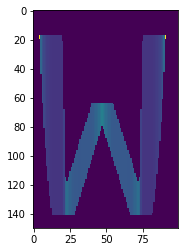

I


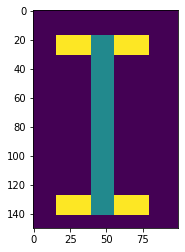

2


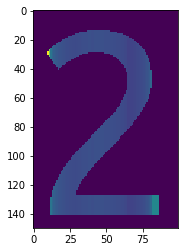

8


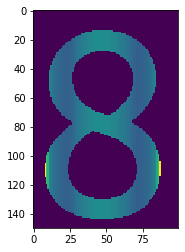

Q


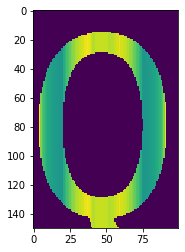

X


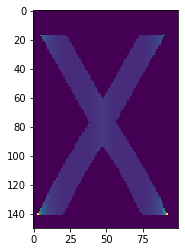

4


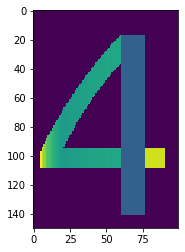

5


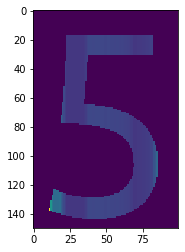

D


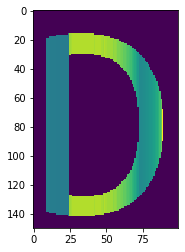

W


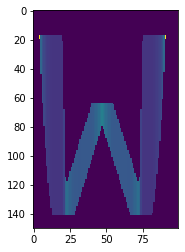

6


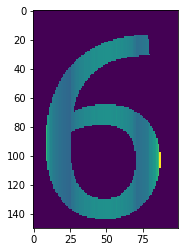

3


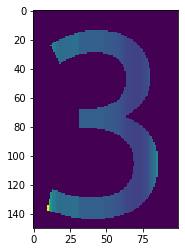

In [11]:
x = 0
while x < len(predictions):
    print(int_to_char[np.argmax(predictions[x])])
    plt.imshow(x_test[x])
    plt.show()
    x+=1

In [9]:
from sklearn.metrics import confusion_matrix
cf_mat = confusion_matrix(ydatatest, y_predict, labels=[x for x in alphabet])

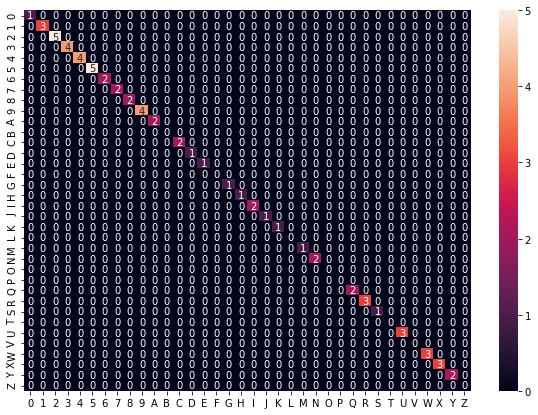

In [10]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cf_mat, index = [i for i in "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"],
                     columns = [i for i in "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)